In [2]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as mtick
import pickle as pk
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 12 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

In [23]:
import re
import html
from urllib import parse
import requests

GOOGLE_TRANSLATE_URL = 'http://translate.google.com/m?q=%s&tl=%s&sl=%s'

def translate(text, to_language="auto", text_language="auto"):

    text = parse.quote(text)
    url = GOOGLE_TRANSLATE_URL % (text,to_language,text_language)
    response = requests.get(url)
    data = response.text
    expr = r'(?s)class="(?:t0|result-container)">(.*?)<'
    result = re.findall(expr, data)
    if (len(result) == 0):
        return ""
    response.keep_alive = False

    return html.unescape(result[0])

In [30]:
mag2journal = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/mag2journal.pk', 'rb'))

In [ ]:
upercase = 'Geosciences, Multidisciplinary'.upper()
for k,v in mag2journal.items():
    if upercase in v['FieldList']:
            print(v)


In [7]:
from collections import Counter
FieldListCounter = Counter()
for k,v in sorted(mag2journal.items(), key=lambda x: -len(set(x[1]['FieldList']))):
    for field in set(v['FieldList']):
        FieldListCounter[field]+=1

In [ ]:
for k, v in sorted(FieldListCounter.items(),key=lambda x:-x[1]):
    # print(k+'$$$$$$'+'$$$$$$'+str(v))
    print(v)

In [20]:
translate("about your situation", "zh-CN","en") #英语转汉语

'关于你的情况'

In [3]:
KeySeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeySeriesAVGdict.pk', 'rb'))
FirstSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstSeriesAVGdict.pk', 'rb'))
LastSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastSeriesAVGdict.pk', 'rb'))

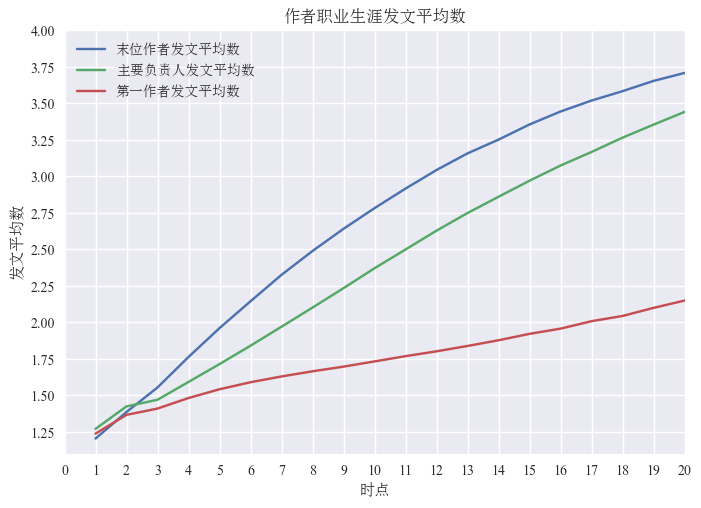

In [35]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,Last, label='末位作者发文平均数')
ax.plot(years1,Key, label='主要负责人发文平均数')
ax.plot(years2,First, label='第一作者发文平均数')
ax.set(xlabel='时点', ylabel='发文平均数',
       title='作者职业生涯发文平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0, 20)
ax.set_ylim(1.1, 4)
ax.set_xticks([i for i in range(0,21,1)])
ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
ax.legend()
fig.savefig("作者职业生涯发文平均数.png",dpi=300)
plt.show()

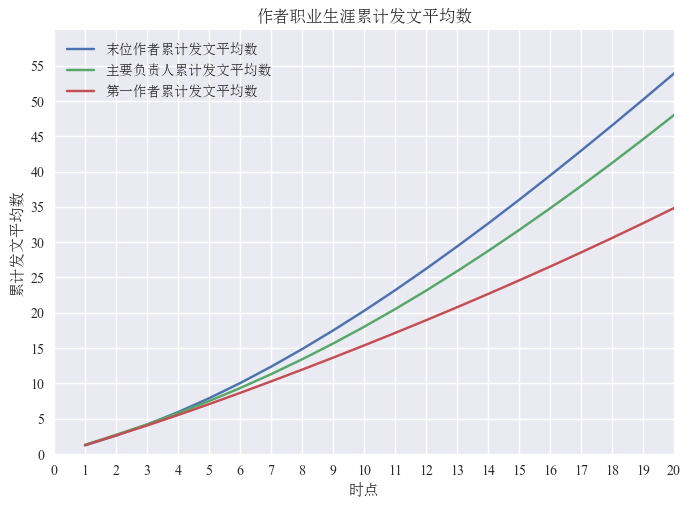

In [41]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.cumsum(Last), label='末位作者累计发文平均数')
ax.plot(years1,np.cumsum(Key), label='主要负责人累计发文平均数')
ax.plot(years2,np.cumsum(First), label='第一作者累计发文平均数')
ax.set(xlabel='时点', ylabel='累计发文平均数',
       title='作者职业生涯累计发文平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0, 20)
ax.set_ylim(1.1, 60)
ax.set_xticks([i for i in range(0,21,1)])
ax.set_yticks(np.array([i for i in range(0,56,5)]))
ax.legend()
fig.savefig("作者职业生涯累计发文平均数.png",dpi=300)
plt.show()

In [15]:
KeyJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJournalSeriesAVGdict.pk', 'rb'))
FirstJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJournalSeriesAVGdict.pk', 'rb'))
LastJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJournalSeriesAVGdict.pk', 'rb'))

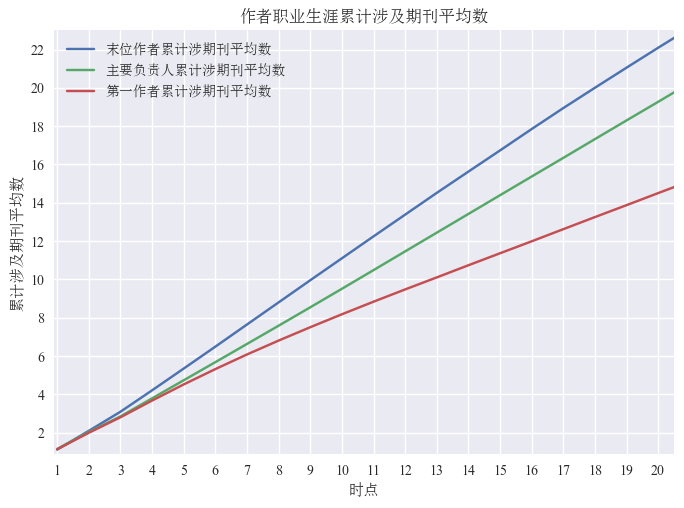

In [30]:
years1 , Key = zip(*sorted(KeyJSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,Last, label='末位作者累计涉期刊平均数')
ax.plot(years1,Key, label='主要负责人累计涉期刊平均数')
ax.plot(years2,First, label='第一作者累计涉期刊平均数')
ax.set(xlabel='时点', ylabel='累计涉及期刊平均数',
       title='作者职业生涯累计涉及期刊平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 23)
ax.set_xticks([i for i in range(1,21,1)])
ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计涉及期刊平均数.png",dpi=300)
plt.show()

# 累计发文/累计期刊数

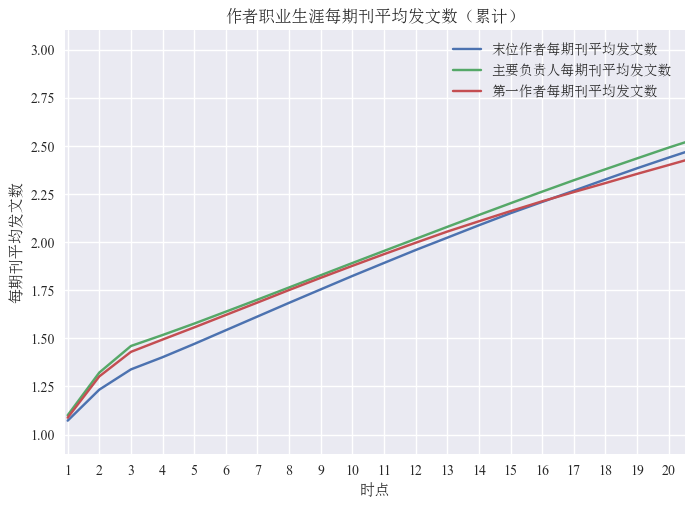

In [45]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))
years1 , KeyJ = zip(*sorted(KeyJSeriesAVGdict.items()))
years2 , FirstJ = zip(*sorted(FirstJSeriesAVGdict.items()))
years3 , LastJ = zip(*sorted(LastJSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.cumsum(Last)/np.array(LastJ), label='末位作者每期刊平均发文数')
ax.plot(years1,np.cumsum(Key)/np.array(KeyJ), label='主要负责人每期刊平均发文数')
ax.plot(years2,np.cumsum(First)/np.array(FirstJ), label='第一作者每期刊平均发文数')
ax.set(xlabel='时点', ylabel='每期刊平均发文数',
       title='作者职业生涯每期刊平均发文数（累计）')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 3.1)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯每期刊平均发文数（累计）.png",dpi=300)
plt.show()

In [8]:
KeyJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJFieldSeriesAVGdict.pk', 'rb'))
FirstJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJFieldSeriesAVGdict.pk', 'rb'))
LastJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJFieldSeriesAVGdict.pk', 'rb'))

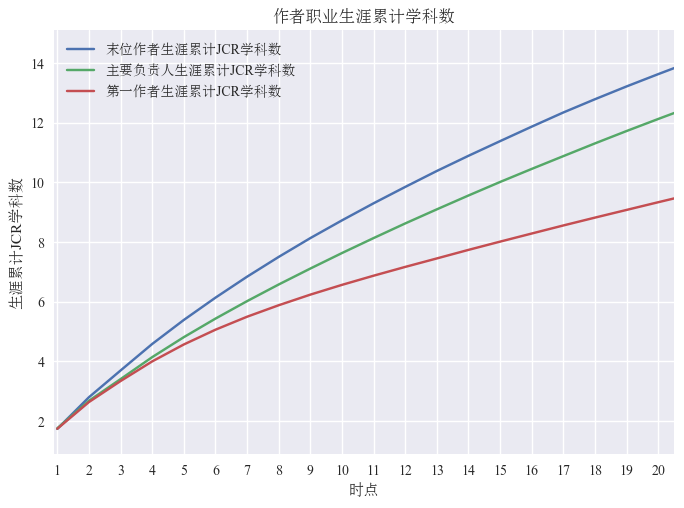

In [9]:
years1 , Key = zip(*sorted(KeyJFieldSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJFieldSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJFieldSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者生涯累计JCR学科数')
ax.plot(years1,np.array(Key), label='主要负责人生涯累计JCR学科数')
ax.plot(years2,np.array(First), label='第一作者生涯累计JCR学科数')
ax.set(xlabel='时点', ylabel='生涯累计JCR学科数',
       title='作者职业生涯累计学科数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 15.1)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计学科数.png",dpi=300)
plt.show()

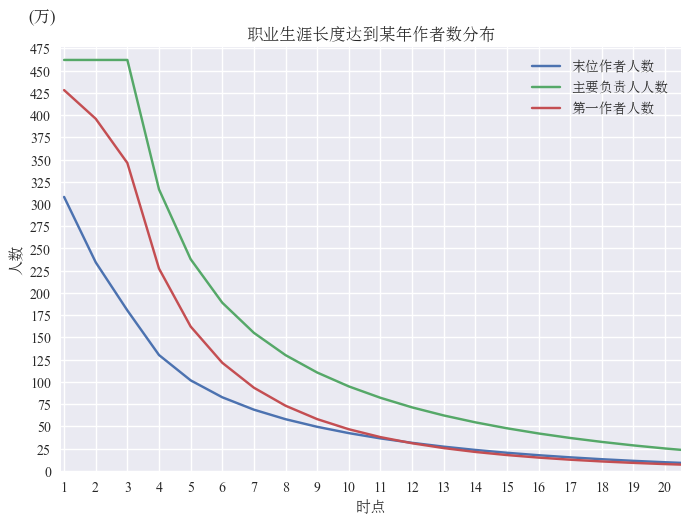

In [66]:
KeyNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNumAuthor.pk', 'rb'))
FirstNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstNumAuthor.pk', 'rb'))
LastNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastNumAuthor.pk', 'rb'))


years1 , Key = zip(*sorted(KeyNumAuthor.items()))
years2 , First = zip(*sorted(FirstNumAuthor.items()))
years3 , Last = zip(*sorted(LastNumAuthor.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last)/10000, label='末位作者人数')
ax.plot(years1,np.array(Key)/10000, label='主要负责人人数')
ax.plot(years2,np.array(First)/10000, label='第一作者人数')
ax.set(xlabel='时点', ylabel='人数',
       title='职业生涯长度达到某年作者数分布')
plt.ticklabel_format(style='plain')

plt.text(-0.03,1.07,'(万)',
horizontalalignment='center',verticalalignment='center',
transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.001, 476.1)
ax.set_xticks([i for i in range(1,21,1)])
ax.set_yticks(np.array([i for i in range(0,476,25)]))
ax.legend()
fig.savefig("职业生涯长度达到某年作者数分布.png",dpi=300)
plt.show()

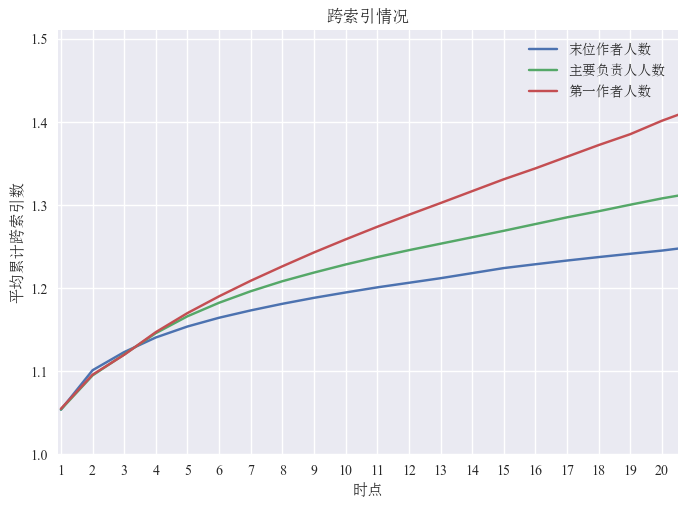

In [75]:
KeyJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJCISeriesAVGdict.pk', 'rb'))
FirstJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJCISeriesAVGdict.pk', 'rb'))
LastJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJCISeriesAVGdict.pk', 'rb'))

years1 , Key = zip(*sorted(KeyJCISeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJCISeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJCISeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者人数')
ax.plot(years1,np.array(Key), label='主要负责人人数')
ax.plot(years2,np.array(First), label='第一作者人数')
ax.set(xlabel='时点', ylabel='平均累计跨索引数',
       title='跨索引情况')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(万)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(1, 1.51)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(0,476,25)]))
ax.legend()
fig.savefig("跨索引情况.png",dpi=300)
plt.show()

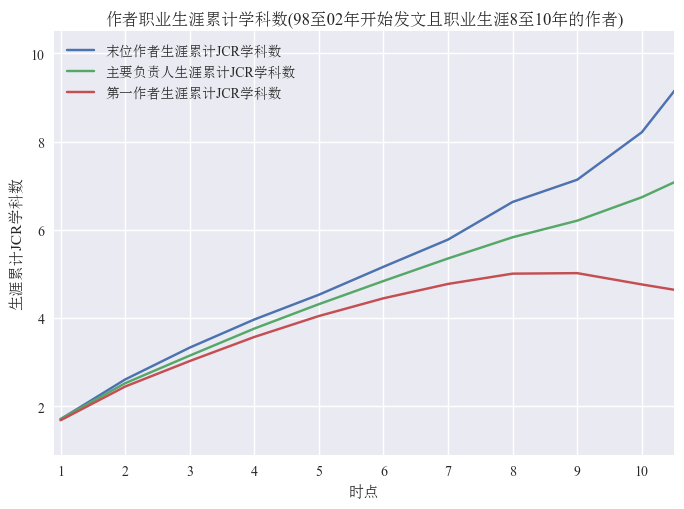

In [11]:
KeyJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJField98_02_8_10SeriesAVGdict.pk', 'rb'))
FirstJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJField98_02_8_10SeriesAVGdict.pk', 'rb'))
LastJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJField98_02_8_10SeriesAVGdict.pk', 'rb'))
years1 , Key = zip(*sorted(KeyJFieldSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJFieldSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJFieldSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者生涯累计JCR学科数')
ax.plot(years1,np.array(Key), label='主要负责人生涯累计JCR学科数')
ax.plot(years2,np.array(First), label='第一作者生涯累计JCR学科数')
ax.set(xlabel='时点', ylabel='生涯累计JCR学科数',
       title='作者职业生涯累计学科数(98至02年开始发文且职业生涯8至10年的作者)')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 10.5)
ax.set_ylim(0.9, 10.5)
ax.set_xticks([i for i in range(1,11,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计学科数(98至02年开始发文且职业生涯8至10年的作者).png",dpi=300)
plt.show()

260812
163183
119554


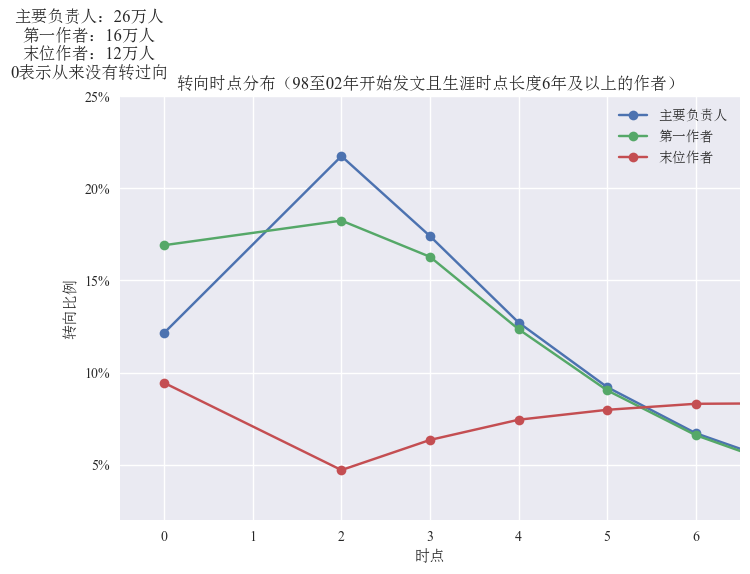

In [37]:
# 真实时间跨度，6年及以上； 98-02年出道
KeyBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCounter98_02_True6plus.pk', 'rb'))
FirstBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstBreakthroughCounter98_02_True6plus.pk', 'rb'))
LastBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastBreakthroughCounter98_02_True6plus.pk', 'rb'))

years1 , KeyNum = zip(*sorted(KeyBreakthroughCounter98_02_True6plus.items()))
years2 , FirstNum = zip(*sorted(FirstBreakthroughCounter98_02_True6plus.items()))
years3 , LastNum = zip(*sorted(LastBreakthroughCounter98_02_True6plus.items()))
print(sum(KeyNum))
print(sum(FirstNum))
print(sum(LastNum))

fig, ax = plt.subplots()
ax.plot(years1,np.array(KeyNum)/260812, label='主要负责人', marker='.', markersize=14)
ax.plot(years2,np.array(FirstNum)/163183, label='第一作者', marker='.', markersize=14)
ax.plot(years3,np.array(LastNum)/119554, label='末位作者', marker='.', markersize=14)
ax.set(xlabel='时点', ylabel='转向比例',
       title='转向时点分布（98至02年开始发文且生涯时点长度6年及以上的作者）')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
# plt.ticklabel_format(style='plain')

plt.text(-0.05,1.12,'主要负责人：26万人\n第一作者：16万人\n末位作者：12万人\n0表示从来没有转过向',
horizontalalignment='center',
verticalalignment='center',
transform=ax.transAxes)
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(0.02, 0.25)
ax.set_xticks([i for i in range(0,7,1)])
# ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
ax.legend()
fig.savefig("转向时点分布（98至02年开始发文且生涯时点长度6年及以上的作者）.png",dpi=300)
plt.show()

35158
32758
16091


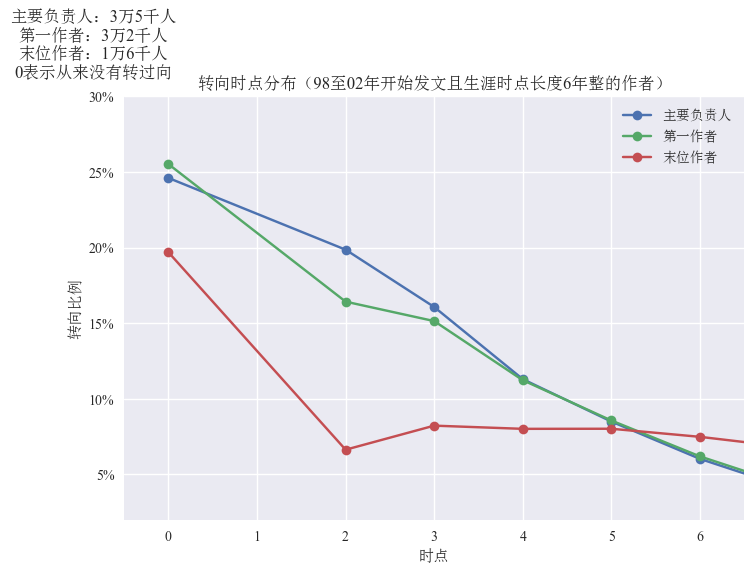

In [43]:
# 真实时间跨度，6年整； 98-02年出道
KeyBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCounter98_02_True6.pk', 'rb'))
FirstBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstBreakthroughCounter98_02_True6.pk', 'rb'))
LastBreakthroughCounter98_02_True6plus=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastBreakthroughCounter98_02_True6.pk', 'rb'))

years1 , KeyNum = zip(*sorted(KeyBreakthroughCounter98_02_True6plus.items()))
years2 , FirstNum = zip(*sorted(FirstBreakthroughCounter98_02_True6plus.items()))
years3 , LastNum = zip(*sorted(LastBreakthroughCounter98_02_True6plus.items()))
print(sum(KeyNum))
print(sum(FirstNum))
print(sum(LastNum))

fig, ax = plt.subplots()
ax.plot(years1,np.array(KeyNum)/35158, label='主要负责人', marker='.', markersize=14)
ax.plot(years2,np.array(FirstNum)/32758, label='第一作者', marker='.', markersize=14)
ax.plot(years3,np.array(LastNum)/16091, label='末位作者', marker='.', markersize=14)
ax.set(xlabel='时点', ylabel='转向比例',
       title='转向时点分布（98至02年开始发文且生涯时点长度6年整的作者）')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
# plt.ticklabel_format(style='plain')

plt.text(-0.05,1.12,'主要负责人：3万5千人\n第一作者：3万2千人\n末位作者：1万6千人\n0表示从来没有转过向',
horizontalalignment='center',
verticalalignment='center',
transform=ax.transAxes)
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(0.02, 0.30)
ax.set_xticks([i for i in range(0,7,1)])
# ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
ax.legend()
fig.savefig("转向时点分布（98至02年开始发文且生涯时点长度6年整的作者）.png",dpi=300)
plt.show()

491838
365683
211605


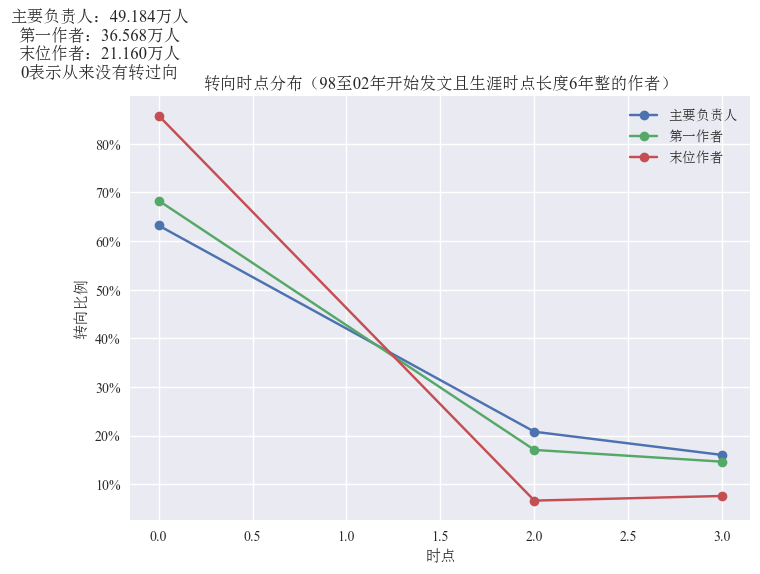

In [49]:
# 真实时间跨度，3年整； 98-02年出道
KeyBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCounter98_02_True3Cut.pk', 'rb'))
FirstBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstBreakthroughCounter98_02_True3Cut.pk', 'rb'))
LastBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastBreakthroughCounter98_02_True3Cut.pk', 'rb'))


years1 , KeyNum = zip(*sorted(KeyBreakthroughCounter98_02_True3Cut.items()))
years2 , FirstNum = zip(*sorted(FirstBreakthroughCounter98_02_True3Cut.items()))
years3 , LastNum = zip(*sorted(LastBreakthroughCounter98_02_True3Cut.items()))
print(sum(KeyNum))
print(sum(FirstNum))
print(sum(LastNum))

fig, ax = plt.subplots()
ax.plot(years1,np.array(KeyNum)/sum(KeyNum), label='主要负责人', marker='.', markersize=14)
ax.plot(years2,np.array(FirstNum)/sum(FirstNum), label='第一作者', marker='.', markersize=14)
ax.plot(years3,np.array(LastNum)/sum(LastNum), label='末位作者', marker='.', markersize=14)
ax.set(xlabel='时点', ylabel='转向比例',
       title='转向时点分布（98至02年开始发文且生涯时点长度6年整的作者）')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
# plt.ticklabel_format(style='plain')

plt.text(-0.05,1.12,'主要负责人：%.3f万人\n第一作者：%.3f万人\n末位作者：%.3f万人\n0表示从来没有转过向'%(sum(KeyNum)/10000,sum(FirstNum)/10000,sum(LastNum)/10000),
horizontalalignment='center',
verticalalignment='center',
transform=ax.transAxes)
# ax.set_xlim(-0.5, 6.5)
# ax.set_ylim(0.02, 0.30)
# ax.set_xticks([i for i in range(0,7,1)])
# ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
ax.legend()
fig.savefig("转向时点分布（98至02年开始发文且生涯时点长度大于2年的作者）.png",dpi=300)
plt.show()

In [ ]:
#参数设置
START_YAER = 1998
END_YAER = 2002
CUT_YEAR_COUNT = 30

for cutyearCount in range(3,CUT_YEAR_COUNT,1):
    KeyBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCounter%d_%d_True%dCut.pk'%(START_YAER,END_YAER,cutyearCount), 'rb'))
    FirstBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstBreakthroughCounter%d_%d_True%dCut.pk'%(START_YAER,END_YAER,cutyearCount), 'rb'))
    LastBreakthroughCounter98_02_True3Cut=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastBreakthroughCounter%d_%d_True%dCut.pk'%(START_YAER,END_YAER,cutyearCount), 'rb'))

    years1 , KeyNum = zip(*sorted(KeyBreakthroughCounter98_02_True3Cut.items()))
    years2 , FirstNum = zip(*sorted(FirstBreakthroughCounter98_02_True3Cut.items()))
    years3 , LastNum = zip(*sorted(LastBreakthroughCounter98_02_True3Cut.items()))

    fig, ax = plt.subplots()
    ax.plot(years1,np.array(KeyNum)/sum(KeyNum), label='主要负责人', marker='.', markersize=14)
    ax.plot(years2,np.array(FirstNum)/sum(FirstNum), label='第一作者', marker='.', markersize=14)
    ax.plot(years3,np.array(LastNum)/sum(LastNum), label='末位作者', marker='.', markersize=14)
    ax.set(xlabel='时点', ylabel='转向比例',
        title='职业生涯前%d个时点转向时点分布（%d至%d年开始发文且生涯时点长度%d年以上的作者）'%(cutyearCount,START_YAER,END_YAER,cutyearCount))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    # plt.ticklabel_format(style='plain')

    plt.text(-0.05,1.12,'主要负责人：%.3f万人\n第一作者：%.3f万人\n末位作者：%.3f万人\n0表示从来没有转过向'%(sum(KeyNum)/10000,sum(FirstNum)/10000,sum(LastNum)/10000),
    horizontalalignment='center',
    verticalalignment='center',
    transform=ax.transAxes)
    # ax.set_xlim(-0.5, 6.5)
    # ax.set_ylim(0.02, 0.30)
    ax.set_xticks([i for i in range(0,cutyearCount+1,1)])
    # ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
    ax.legend()
    fig.savefig("职业生涯前%d个时点转向时点分布（%d至%d年开始发文且生涯时点长度%d年以上的作者）.png"%(cutyearCount,START_YAER,END_YAER,cutyearCount),dpi=300)
    plt.show()